<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Convolutional Neural Networks with Keras</font></h1>


In this lab, we will learn how to use the Keras library to build convolutional neural networks. We will also use the popular MNIST dataset and we will compare our results to using a conventional neural network.


<h2>Convolutional Neural Networks with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build convolutional neural networks.</h5>
<h5> 2. Convolutional Neural Network with One Convolutional and Pooling Layers.</h5>
<h5> 3. Convolutional Neural Network with Two Convolutional and Pooling Layers.</h5>


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. <a href="#item41">Import Keras and Packages</a>   
2. <a href="#item42">Convolutional Neural Network with One Convolutional and Pooling Layers</a>  
3. <a href="#item43">Convolutional Neural Network with Two Convolutional and Pooling Layers</a>  

</font>
</div>


<a id='item41'></a>


## Import Keras and Packages


Let's start by importing the keras libraries and the packages that we would need to build a neural network.


In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

When working with convolutional neural networks in particular, we will need additional packages.


In [18]:
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

<a id='item42'></a>


## Convolutional Layer with One set of convolutional and pooling layers


In [19]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
y_train[0:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

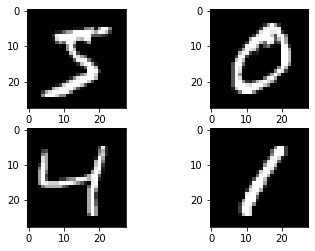

In [20]:
import matplotlib.pyplot as plt
# plot 4 images as gray scale
plt.subplot(221)#2 rows x 2 columns
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' ))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' ))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' ))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' ))
# show the plot
plt.show()

Let's normalize the pixel values to be between 0 and 1


In [21]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

Next, let's convert the target variable into binary categories


In [32]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

Next, let's define a function that creates our model. Let's start with one set of convolutional and pooling layers.


In [23]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Finally, let's call the function to create the model, and then let's train it and evaluate it.


In [24]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 72s - loss: 0.3072 - acc: 0.9138 - val_loss: 0.1200 - val_acc: 0.9636
Epoch 2/10
 - 70s - loss: 0.0914 - acc: 0.9732 - val_loss: 0.0642 - val_acc: 0.9795
Epoch 3/10
 - 70s - loss: 0.0612 - acc: 0.9815 - val_loss: 0.0484 - val_acc: 0.9847
Epoch 4/10
 - 69s - loss: 0.0475 - acc: 0.9860 - val_loss: 0.0422 - val_acc: 0.9852
Epoch 5/10
 - 70s - loss: 0.0376 - acc: 0.9888 - val_loss: 0.0446 - val_acc: 0.9850
Epoch 6/10
 - 71s - loss: 0.0329 - acc: 0.9898 - val_loss: 0.0390 - val_acc: 0.9869
Epoch 7/10
 - 72s - loss: 0.0272 - acc: 0.9916 - val_loss: 0.0428 - val_acc: 0.9870
Epoch 8/10
 - 71s - loss: 0.0233 - acc: 0.9931 - val_loss: 0.0369 - val_acc: 0.9877
Epoch 9/10
 - 71s - loss: 0.0188 - acc: 0.9944 - val_loss: 0.0353 - val_acc: 0.9882
Epoch 10/10
 - 69s - loss: 0.0167 - acc: 0.9949 - val_loss: 0.0367 - val_acc: 0.9883
Accuracy: 0.9883 
 Error: 1.1700000000000017


In [73]:
import numpy as np
predictions = model.predict(X_test[0:6])
classes = np.argmax(predictions, axis=1)
classes

array([7, 2, 1, 0, 4, 1])

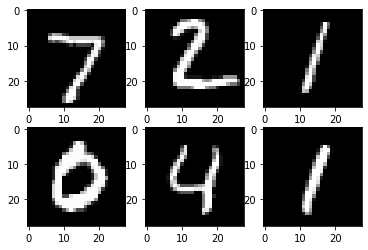

In [127]:
# plot 4 images as gray scale
plt.subplot(231)#2 rows x 3 columns
plt.imshow(X_test[0], cmap=plt.get_cmap( 'gray' ))
plt.subplot(232)
plt.imshow(X_test[1], cmap=plt.get_cmap( 'gray' ))
plt.subplot(233)
plt.imshow(X_test[2], cmap=plt.get_cmap( 'gray' ))
plt.subplot(234)
plt.imshow(X_test[3], cmap=plt.get_cmap( 'gray' ))
plt.subplot(235)
plt.imshow(X_test[4], cmap=plt.get_cmap( 'gray' ))
plt.subplot(236)
plt.imshow(X_test[5], cmap=plt.get_cmap( 'gray' ))
plt.show()

* * *


<a id='item43'></a>


## Convolutional Layer with two sets of convolutional and pooling layers


Let's redefine our convolutional model so that it has two convolutional and pooling layers instead of just one layer of each.


In [10]:
def convolutional_model():
    
    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

Now, let's call the function to create our new convolutional neural network, and then let's train it and evaluate it.


In [11]:
# build the model
model = convolutional_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 77s - loss: 0.5158 - acc: 0.8519 - val_loss: 0.1638 - val_acc: 0.9491
Epoch 2/10
 - 76s - loss: 0.1301 - acc: 0.9606 - val_loss: 0.0953 - val_acc: 0.9701
Epoch 3/10
 - 75s - loss: 0.0925 - acc: 0.9712 - val_loss: 0.0739 - val_acc: 0.9766
Epoch 4/10
 - 75s - loss: 0.0750 - acc: 0.9772 - val_loss: 0.0695 - val_acc: 0.9770
Epoch 5/10
 - 79s - loss: 0.0659 - acc: 0.9801 - val_loss: 0.0567 - val_acc: 0.9821
Epoch 6/10
 - 77s - loss: 0.0565 - acc: 0.9831 - val_loss: 0.0530 - val_acc: 0.9835
Epoch 7/10
 - 78s - loss: 0.0505 - acc: 0.9845 - val_loss: 0.0493 - val_acc: 0.9847
Epoch 8/10
 - 77s - loss: 0.0451 - acc: 0.9861 - val_loss: 0.0441 - val_acc: 0.9851
Epoch 9/10
 - 78s - loss: 0.0413 - acc: 0.9872 - val_loss: 0.0513 - val_acc: 0.9837
Epoch 10/10
 - 79s - loss: 0.0366 - acc: 0.9886 - val_loss: 0.0441 - val_acc: 0.9854
Accuracy: 0.9854 
 Error: 1.4599999999999937


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                                          |
| ----------------- | ------- | ---------- | ----------------------------------------------------------- |
| 2020-09-21        | 2.0     | Srishti    | Migrated Lab to Markdown and added to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


This notebook is part of a course on **Coursera** called _Introduction to Deep Learning & Neural Networks with Keras_. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week4_LAB1).


<hr>

Copyright © 2019 [IBM Developer Skills Network](https://cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork-20718188&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
